<a href="https://colab.research.google.com/github/Aparna-981/ict-project/blob/main/unsupervised_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Data Load

In [2]:
adult=pd.read_csv("/content/adult_dataset.csv")
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States,<=50K.
48838,64.0,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40.0,United-States,<=50K.
48839,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States,<=50K.
48840,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40.0,United-States,<=50K.


# EDA

In [3]:
adult.shape


(48842, 15)

In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


In [5]:
adult.duplicated().sum()

np.int64(16)

In [6]:
adult.drop_duplicates(inplace=True)

In [7]:
adult.nunique()

,0
age,82
workclass,9
fnlwgt,28523
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


In [8]:
print(adult['income'].unique())


['<=50K' '>50K' '<=50K.' '>50K.']


In [9]:
# Remove periods and extra spaces
adult['income'] =adult['income'].str.strip().str.replace('.', '', regex=False)

# Check unique values after cleaning
print(adult['income'].unique())


['<=50K' '>50K']


In [10]:
le= LabelEncoder()
adult['income']=le.fit_transform(adult['income'])
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,0


In [11]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,0


In [12]:
adult_data=adult.drop(['income'],axis=1)

In [13]:
adult_data.drop(['fnlwgt'],axis=1,inplace=True)

In [14]:
adult_data.nunique()

,0
age,82
workclass,9
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2
capital-gain,123


In [15]:
adult_data.isnull().sum()

,0
age,2442
workclass,3362
education,0
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0
capital-gain,0


In [16]:
adult_data.isin(['?']).any(axis=1,)

,0
0,False
1,False
2,False
3,False
4,False
...,...
48837,False
48838,False
48839,False
48840,False


In [17]:
adult_data[adult_data.isin(['?']).any(axis=1)].index

Index([   14,    27,    38,    51,    61,    69,    77,    93,   106,   128,
       ...
       32490, 32492, 32494, 32510, 32525, 32530, 32531, 32539, 32541, 32542],
      dtype='int64', length=2374)

In [18]:
adult_data[adult_data.isin(['NaN']).any(axis=1)].index

Index([], dtype='int64')

In [19]:
adult_data.replace('?', np.nan, inplace=True)

# handle missing value

In [20]:
adult_data.isnull().sum()

,0
age,2442
workclass,5125
education,0
education-num,0
marital-status,0
occupation,5115
relationship,0
race,0
sex,0
capital-gain,0


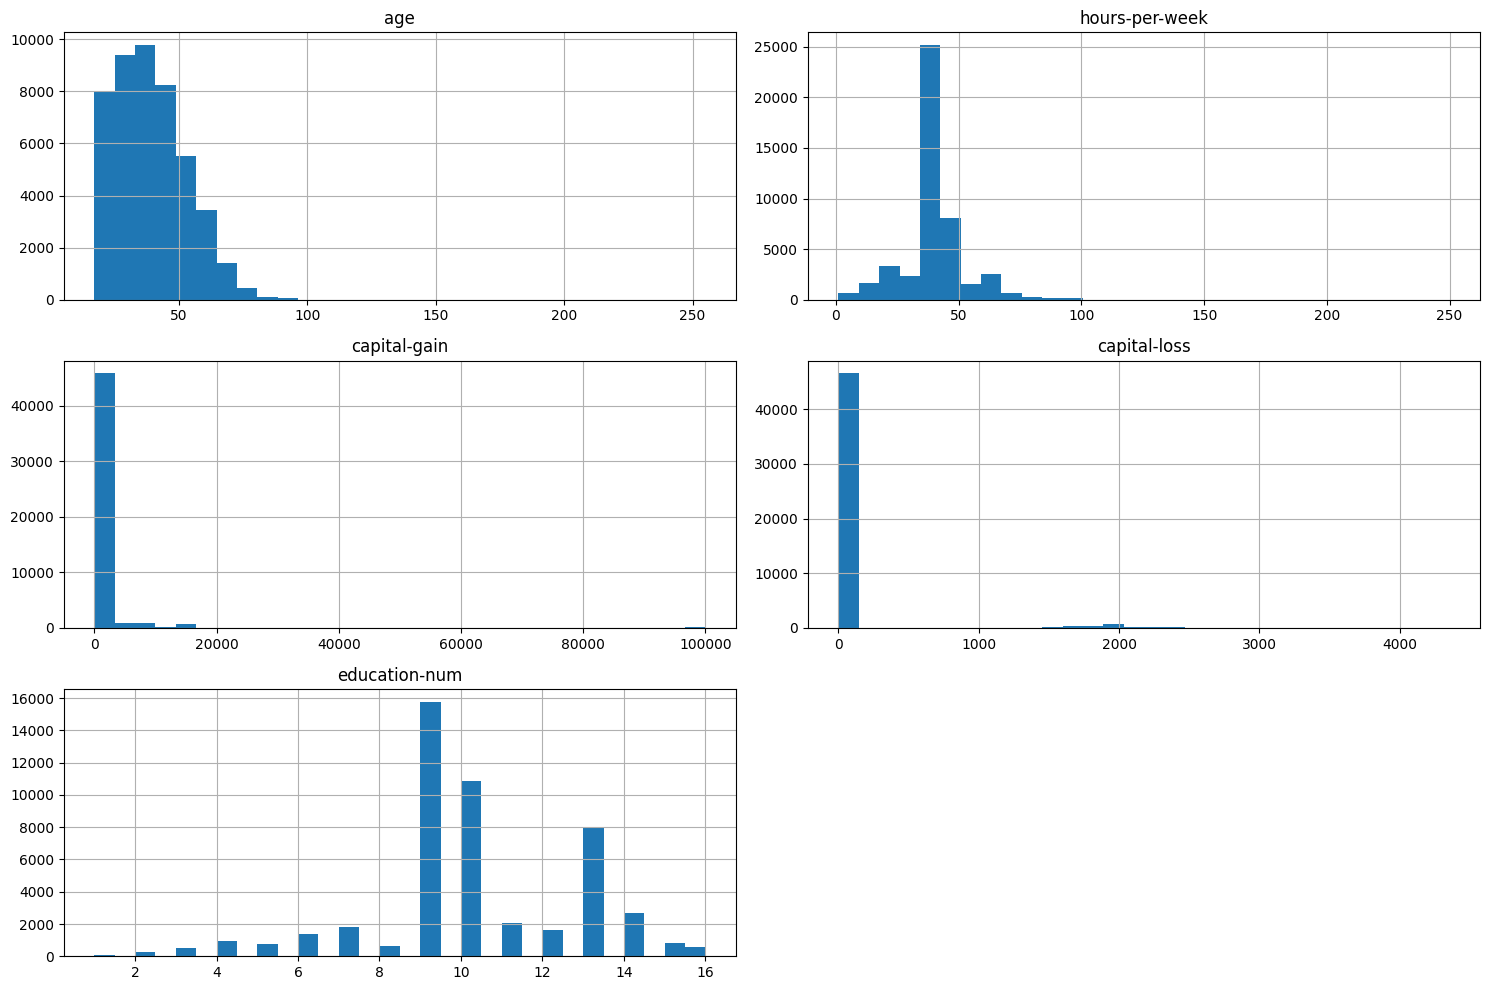

In [21]:
adult_data[['age','hours-per-week','capital-gain','capital-loss','education-num']].hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

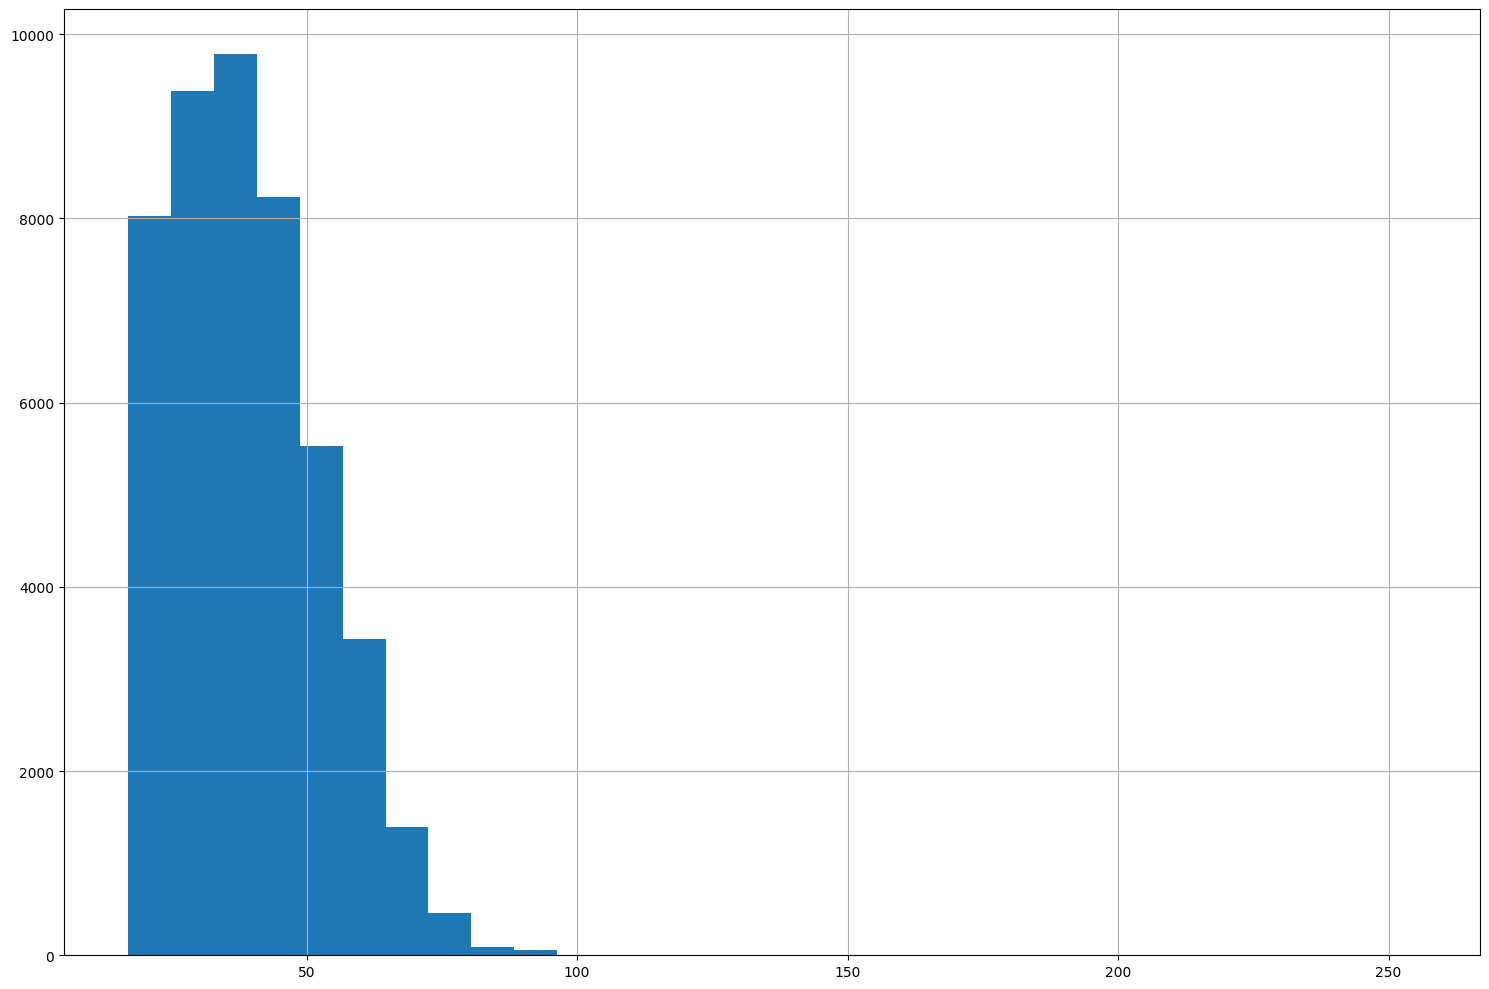

In [22]:
adult_data['age'].hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

### numerical value is replaced median

In [23]:
adult_data['age']=adult_data['age'].fillna(adult_data['age'].median())

In [24]:
adult_data['hours-per-week']=adult_data['hours-per-week'].fillna(adult_data['hours-per-week'].median())

In [25]:
adult_data['workclass'] = adult_data['workclass'].fillna(
    adult_data['workclass'].mode()[0]
)


### catergorial values is replaced by mode

In [26]:
adult_data['occupation'] = adult_data['occupation'].fillna(
    adult_data['occupation'].mode()[0]
)


In [27]:
adult_data['native-country'] = adult_data['native-country'].fillna(
    adult_data['native-country'].mode()[0]
)

In [28]:
adult_data.isnull().sum()


,0
age,0
workclass,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0
capital-gain,0


# Outlier Handling

<Axes: >

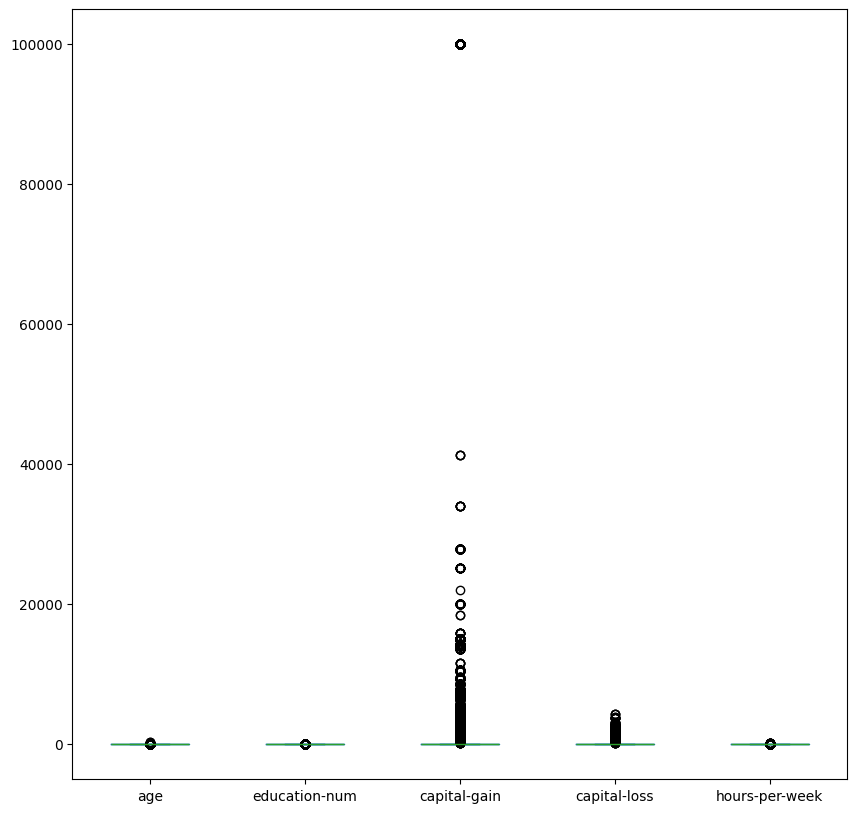

In [29]:
adult_data.plot(kind='box',figsize=(10,10))

In [30]:
num_cols = adult_data.select_dtypes(include=['int64', 'float64']).columns

outlier_summary = {}

for col in num_cols :
    Q1 = adult_data[col].quantile(0.25)
    Q3 = adult_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = adult_data[(adult_data[col] < lower) | (adult_data[col] > upper)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary

{'age': 363,
 'education-num': 1792,
 'capital-gain': 4035,
 'capital-loss': 2282,
 'hours-per-week': 12833}

In [31]:
cols = [
   'age',
 'education-num',
 'hours-per-week',
   'capital-loss','capital-gain'
]
for col in cols:
    Q1 = adult_data[col].quantile(0.25)
    Q3 = adult_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    adult_data[col] = adult_data[col].clip(lower_limit, upper_limit)


<Axes: >

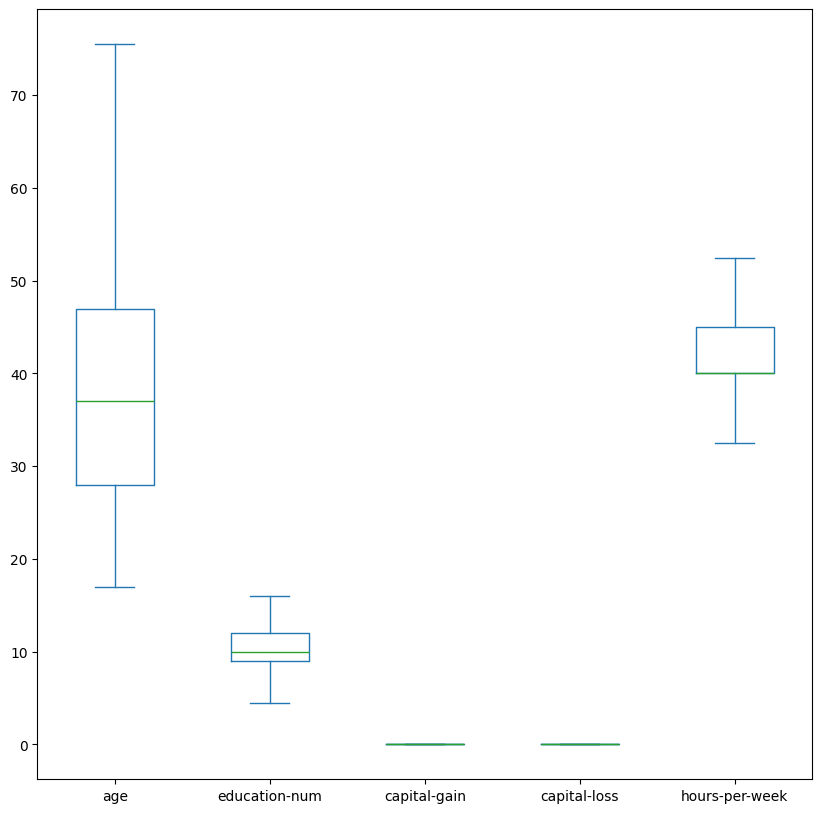

In [32]:
adult_data.plot(kind='box',figsize=(10,10))

# Encoding

In [33]:
adult_data.nunique()



,0
age,60
workclass,8
education,16
education-num,13
marital-status,7
occupation,14
relationship,6
race,5
sex,2
capital-gain,1


sex has only two unique values: Label encoder

In [34]:
le=LabelEncoder()
adult_data['sex']=le.fit_transform(adult_data['sex'])
adult_data


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,1,0,0,40.0,United-States
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,32.5,United-States
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40.0,United-States
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40.0,United-States
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,0,0,0,36.0,United-States
48838,64.0,Private,HS-grad,9.0,Widowed,Prof-specialty,Other-relative,Black,1,0,0,40.0,United-States
48839,38.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,50.0,United-States
48840,44.0,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,1,0,0,40.0,United-States


One hot

In [35]:
adult_data=pd.get_dummies(adult_data,columns=['workclass'],prefix=['mode'],drop_first=True,dtype=int)
adult_data=pd.get_dummies(adult_data,columns=['education'],prefix=['level'],drop_first=True,dtype=int)
adult_data=pd.get_dummies(adult_data,columns=['marital-status'],drop_first=True,dtype=int)
adult_data=pd.get_dummies(adult_data,columns=['occupation'],prefix=['type'],drop_first=True,dtype=int)
adult_data=pd.get_dummies(adult_data,columns=['relationship'],prefix=['type'],drop_first=True,dtype=int)
adult_data=pd.get_dummies(adult_data,columns=['race'],drop_first=True,dtype=int)
adult_data=pd.get_dummies(adult_data,columns=['native-country'],prefix=['count'],drop_first=True,dtype=int)


In [36]:
adult_data

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,mode_Local-gov,mode_Never-worked,mode_Private,mode_Self-emp-inc,...,count_Portugal,count_Puerto-Rico,count_Scotland,count_South,count_Taiwan,count_Thailand,count_Trinadad&Tobago,count_United-States,count_Vietnam,count_Yugoslavia
0,39.0,13.0,1,0,0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,13.0,1,0,0,32.5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,9.0,1,0,0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53.0,7.0,1,0,0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28.0,13.0,0,0,0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,13.0,0,0,0,36.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48838,64.0,9.0,1,0,0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48839,38.0,13.0,1,0,0,50.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,44.0,13.0,1,0,0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Scaling

In [37]:
cols=['age','hours-per-week','education-num']
scaler = MinMaxScaler()
adult_data[cols] = scaler.fit_transform(adult_data[cols])

In [38]:
adult_data.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,mode_Local-gov,mode_Never-worked,mode_Private,mode_Self-emp-inc,...,count_Portugal,count_Puerto-Rico,count_Scotland,count_South,count_Taiwan,count_Thailand,count_Trinadad&Tobago,count_United-States,count_Vietnam,count_Yugoslavia
0,0.376068,0.739130,1,0,0,0.375,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.564103,0.739130,1,0,0,0.000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.358974,0.391304,1,0,0,0.375,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.615385,0.217391,1,0,0,0.375,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.188034,0.739130,0,0,0,0.375,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


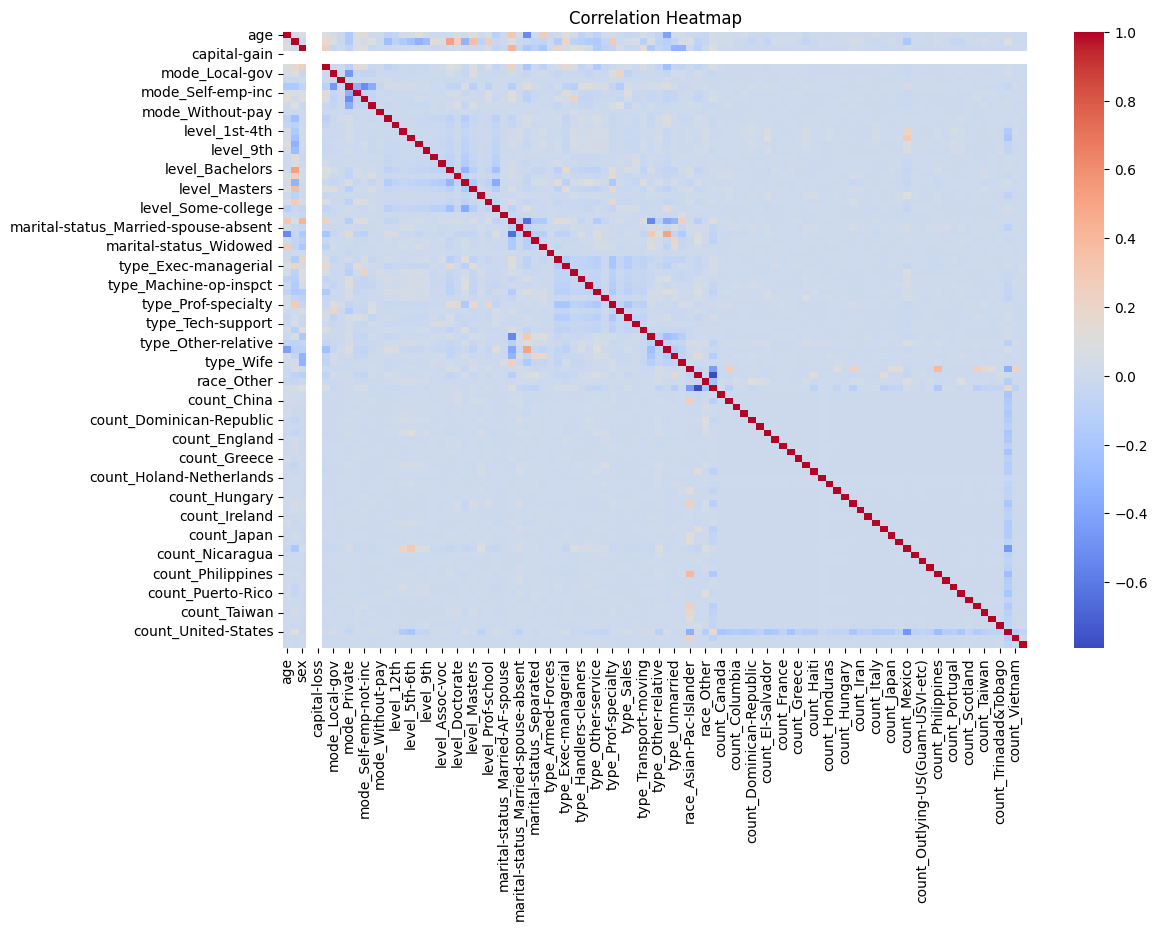

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(adult_data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()
#

# PCA

In [40]:
pca = PCA()
X_pca = pca.fit_transform(adult_data)

In [41]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14697152, 0.22913118, 0.29732628, 0.36042611, 0.41453178,
       0.46837285, 0.51659363, 0.56095438, 0.59102604, 0.62029248,
       0.64873526, 0.67490729, 0.69813084, 0.71987494, 0.73950257,
       0.7578211 , 0.77574287, 0.79265153, 0.80650316, 0.8193266 ,
       0.83170748, 0.8430896 , 0.85420086, 0.86426015, 0.87395296,
       0.88332301, 0.8923525 , 0.90109483, 0.90917975, 0.91673287,
       0.92381077, 0.93065281, 0.9371099 , 0.94245238, 0.94753232,
       0.95241779, 0.95695685, 0.960708  , 0.96440778, 0.96787072,
       0.97083469, 0.97369854, 0.97621816, 0.97829827, 0.97986346,
       0.98119001, 0.98246962, 0.98359218, 0.98460888, 0.98553436,
       0.98638852, 0.98714619, 0.98788114, 0.98860613, 0.98928976,
       0.989918  , 0.99052095, 0.99109168, 0.99163548, 0.99217002,
       0.99268639, 0.99318049, 0.99364159, 0.99408945, 0.99452898,
       0.99496198, 0.99536963, 0.995761  , 0.99612964, 0.99648888,
       0.99680271, 0.99709672, 0.99735816, 0.99760844, 0.99785

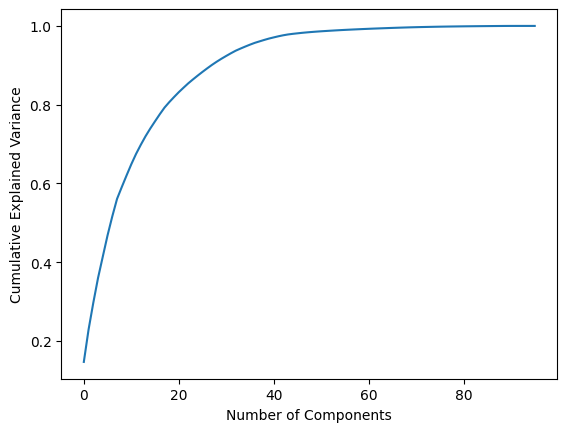

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [43]:
pca = PCA(n_components=0.90)
adult_pca = pca.fit_transform(adult_data)

convert to dataframe

In [44]:
pca_data = pd.DataFrame(
    adult_pca,
    columns=[f'PC{i+1}' for i in range(adult_pca.shape[1])]
)

In [45]:
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,-0.518071,-0.773243,-0.408901,1.037607,-0.390103,-0.353172,-0.202497,-0.405840,0.093146,-0.227303,...,0.114916,0.228619,0.674446,-0.328350,0.162827,0.023894,-0.140776,-0.103450,0.049841,-0.372395
1,0.992665,-0.725829,-0.257656,0.242400,-0.370906,-0.422616,0.025735,-0.917940,-0.006776,0.173169,...,0.054286,0.067363,-0.272835,0.061226,-0.065511,-0.124699,-0.035701,-0.016156,0.048253,0.023557
2,-0.198290,0.704211,-0.392076,0.697989,-0.072190,0.415350,-0.031675,0.277277,-0.060722,0.088878,...,-0.230022,0.246860,0.030051,0.289467,0.768774,0.035975,0.156739,-0.054542,-0.144711,0.157780
3,0.540956,0.249697,0.205915,-0.541259,0.117359,-0.061485,-1.214688,0.086059,-0.073345,-0.116679,...,-0.537193,-0.201794,-0.026957,-0.085047,0.823956,0.121792,0.331980,-0.219553,-0.175476,-0.002815
4,0.244964,-0.614907,-0.586790,-1.082851,1.082315,-0.242799,-0.931962,-0.084159,-0.444546,-0.372691,...,-0.143834,-0.060677,-0.060670,-0.008401,0.175976,-0.253534,-0.472772,0.118289,-0.266589,0.113234


# Clustering

K - means Clustering

In [46]:
wcss=[]
sil=[]

for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init= 'k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(adult_pca)
  wcss.append(kmeans.inertia_)
  labels=kmeans.predict(adult_pca)
  sil_score=silhouette_score(adult_pca,labels)
  print('wcss and silohouette score for K= {} is {} and {}'.format(i,kmeans.inertia_,sil_score))
  sil.append(sil_score)
wcss

wcss and silohouette score for K= 2 is 142556.32858244868 and 0.1444223157410456
wcss and silohouette score for K= 3 is 132493.4773915539 and 0.1557123392125836
wcss and silohouette score for K= 4 is 124564.07276497464 and 0.17287719064027612
wcss and silohouette score for K= 5 is 118320.95559850105 and 0.12050128063717845
wcss and silohouette score for K= 6 is 114616.03941319186 and 0.12830026116417861
wcss and silohouette score for K= 7 is 110621.38615401022 and 0.11011061045948628
wcss and silohouette score for K= 8 is 107562.18412236894 and 0.1191512884555619
wcss and silohouette score for K= 9 is 104587.68970565907 and 0.12020777279177003
wcss and silohouette score for K= 10 is 103039.46311621115 and 0.12899749406891226


[142556.32858244868,
 132493.4773915539,
 124564.07276497464,
 118320.95559850105,
 114616.03941319186,
 110621.38615401022,
 107562.18412236894,
 104587.68970565907,
 103039.46311621115]

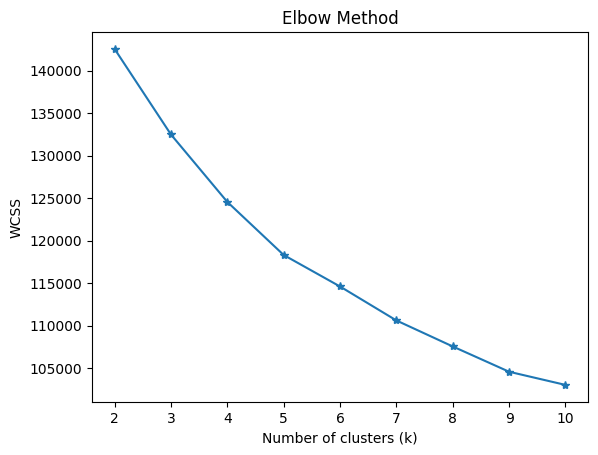

In [47]:
plt.plot(range(2,11), wcss,marker="*")
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

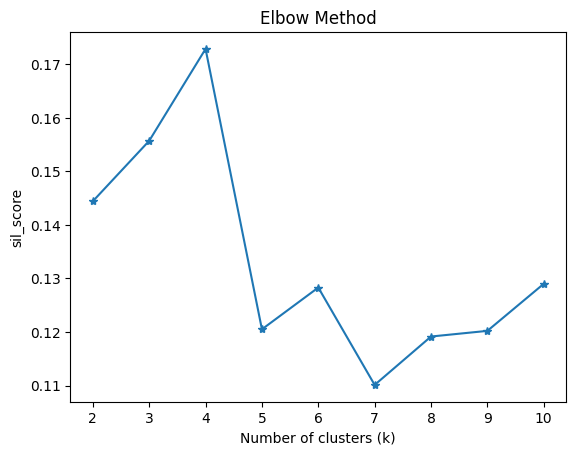

In [48]:
plt.plot(range(2,11), sil,marker="*")
plt.xlabel('Number of clusters (k)')
plt.ylabel('sil_score')
plt.title('Elbow Method')
plt.show()

In [49]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0,max_iter=300,n_init=10)
kmeans_labels=kmeans.fit_predict(adult_pca)
adult_data['kmeans_clusters']=kmeans_labels
adult_data

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,mode_Local-gov,mode_Never-worked,mode_Private,mode_Self-emp-inc,...,count_Puerto-Rico,count_Scotland,count_South,count_Taiwan,count_Thailand,count_Trinadad&Tobago,count_United-States,count_Vietnam,count_Yugoslavia,kmeans_clusters
0,0.376068,0.739130,1,0,0,0.375,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.564103,0.739130,1,0,0,0.000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
2,0.358974,0.391304,1,0,0,0.375,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.615385,0.217391,1,0,0,0.375,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2
4,0.188034,0.739130,0,0,0,0.375,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.376068,0.739130,0,0,0,0.175,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
48838,0.803419,0.391304,1,0,0,0.375,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3
48839,0.358974,0.739130,1,0,0,0.875,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2
48840,0.461538,0.739130,1,0,0,0.375,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [50]:
adult_data['kmeans_clusters']

,kmeans_clusters
0,0
1,2
2,0
3,2
4,2
...,...
48837,0
48838,3
48839,2
48840,1


In [51]:
pca = PCA(n_components=2)
adult_pca = pca.fit_transform(adult_data)


In [52]:

pca_data = pd.DataFrame(adult_pca, columns=['PC1', 'PC2'])


In [53]:
pca_data['kmeans_clusters'] = labels

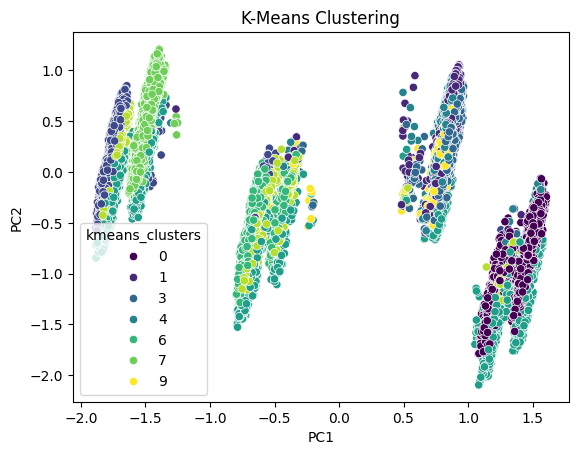

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='kmeans_clusters',
    data=pca_data,
    palette='viridis'
)

plt.title('K-Means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



In [55]:
comparison_df=pd.crosstab(pca_data['kmeans_clusters'],adult['income'])
display(comparison_df)

income,0,1
kmeans_clusters,,
0,3056,891
1,5275,1958
2,3778,1121
3,4826,1548
4,3200,1235
5,2986,817
6,3922,1036
7,3813,1122
8,3162,894


# agglomerative clustering

In [56]:
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

X=np.array(pca_data)

In [ ]:
for i in range(2,11):

  hc=AgglomerativeClustering(n_clusters=i,linkage='ward')
  hc_labels=hc.fit_predict(pca_data)
  sil_score=silhouette_score(pca_data,hc_labels)
  print('silohouette score for K= {} is {} '.format(i,sil_score))